In [1]:
import pandas as pd
import local_config
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv(f'{local_config.DATA_DIR}/angle_testing/all_simulations.csv')


In [2]:
# set up the dataset for new data

df["Sigma_Ratio"] = np.abs(df["Sigma_2"] / df["Sigma_1"])  # normalize sigmas

df['Theta'] = df['Theta'].apply(lambda x: min(x, 180 - x))  # keep thetas in bounds

# Save it back
df.to_csv(f'{local_config.DATA_DIR}/angle_testing/all_simulations.csv', index=False)

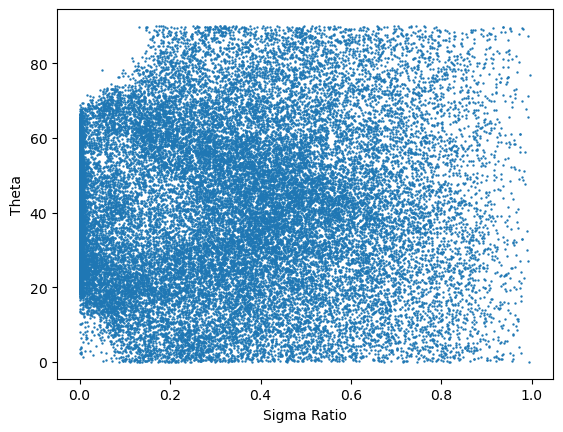

In [3]:
# thetas vs sigma ratio scatter

plt.scatter(df["Sigma_Ratio"], df["Theta"], s=0.5)
plt.xlabel("Sigma Ratio")
plt.ylabel("Theta")
plt.show()

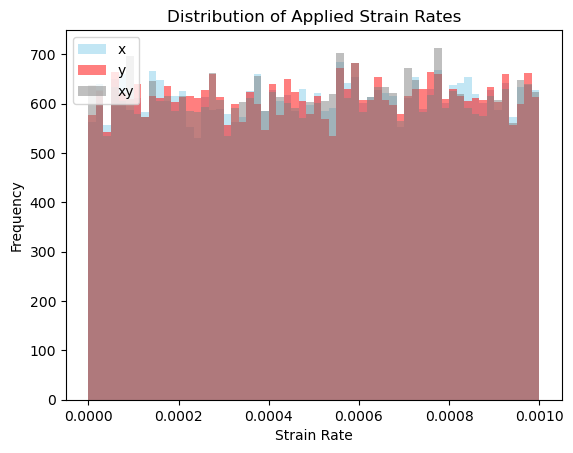

In [4]:
# strain rate histogram

plt.hist(df["Strain Rate x"], bins=60, color='skyblue', alpha=0.5, label='x')
plt.hist(df["Strain Rate y"], bins=60, color='red', alpha=0.5, label='y')
plt.hist(df["Strain Rate xy"], bins=60, color='grey', alpha=0.5, label='xy')

plt.xlabel("Strain Rate")
plt.ylabel("Frequency")
plt.legend()
plt.title("Distribution of Applied Strain Rates")
plt.show()

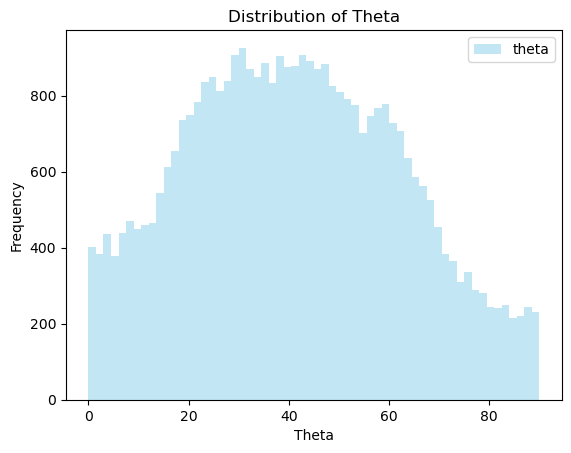

In [5]:
# Thetas histogram

plt.hist(df["Theta"], bins=60, color='skyblue', alpha=0.5, label='theta')

plt.xlabel("Theta")
plt.ylabel("Frequency")
plt.legend()
plt.title("Distribution of Theta")
plt.show()

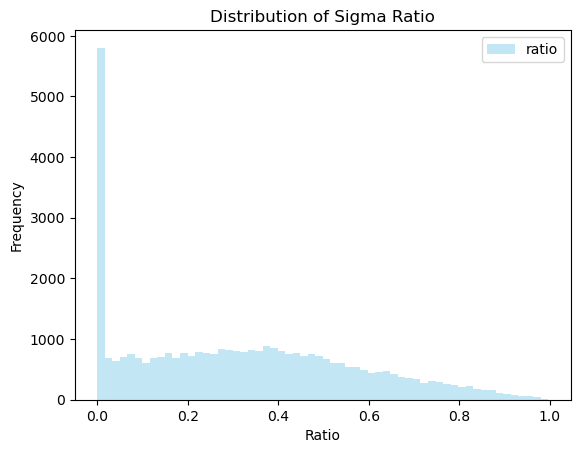

In [6]:
# ratios histogram

plt.hist(df["Sigma_Ratio"], bins=60, color='skyblue', alpha=0.5, label='ratio')

plt.xlabel("Ratio")
plt.ylabel("Frequency")
plt.legend()
plt.title("Distribution of Sigma Ratio")
plt.show()

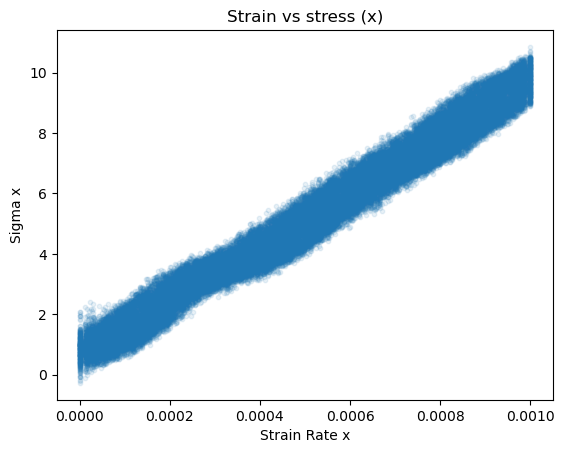

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import local_config

df = pd.read_csv(f'{local_config.DATA_DIR}/angle_testing/all_simulations_wrongxy.csv')

targ = 'x'

plt.scatter(df[f"Strain Rate {targ}"], df[f"Sigma_{targ}"], alpha=0.1, s=10)
plt.xlabel(f"Strain Rate {targ}")
plt.ylabel(f"Sigma {targ}")
plt.title(f"Strain vs stress ({targ})")
plt.show()


In [7]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('samples.txt', delim_whitespace=True, header=None)
print(df)

c = 0
for i in range(len(df)):
    if df[0][i] == 0.001 or df[1][i] == 0.001 or df[2][i] == 0.001:
        # print(df.iloc[i])
        c += 1

print(c)


plt.hist(df[0], bins=200, color='skyblue', alpha=0.5, label='x')
plt.hist(df[1], bins=200, color='red', alpha=0.5, label='y')
plt.hist(df[2], bins=200, color='grey', alpha=0.5, label='xy')

plt.xlabel("Strain Rate")
plt.ylabel("Frequency")
plt.legend()
plt.title("Distribution of Applied Strain Rates")
plt.show()

/tmp/ipykernel_1374339/142409332.py:4: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv('samples.txt', delim_whitespace=True, header=None)


EmptyDataError: No columns to parse from file

/tmp/ipykernel_1184654/2325833280.py:53: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


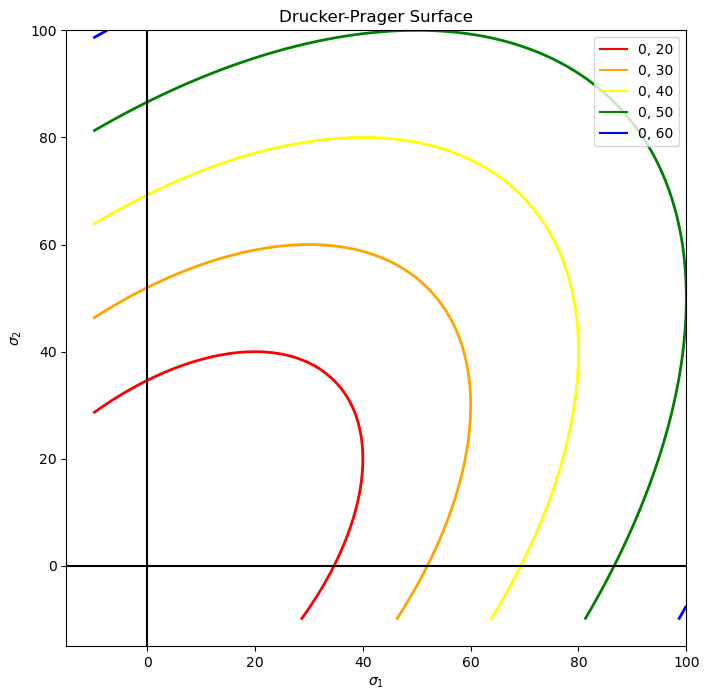

In [12]:
import numpy as np
import matplotlib.pyplot as plt
# Set plot range around your data


grid = np.linspace(-10, 100, 1000)

# Create sigma1, sigma2 grid
sig1, sig2 = np.meshgrid(grid, grid)
sig3 = np.zeros_like(sig1)  

# Compute I1 and sqrt(J2)
i1 = sig1 + sig2 + sig3
mean_stress = i1 / 3
dev_xx = sig1 - mean_stress
dev_yy = sig2 - mean_stress
dev_zz = sig3 - mean_stress

j2 = 0.5 * (dev_xx**2 + dev_yy**2 + dev_zz**2)

def plot_dp(a, k, col, ax):
    F = np.sqrt(j2) + a * i1 - k
    ax.contour(sig1, sig2, F, levels=[0], colors=col, linewidths=2)
    ax.plot([], [], color=col, label=f"{a}, {k}")  # for legend 

fig, ax = plt.subplots(figsize=(8, 8))

# plot_dp(-0.2, 30, "red", ax)
# plot_dp(-0.1, 30, "orange", ax)
# plot_dp(0.0, 30, "yellow", ax)
# plot_dp(0.1, 30, "green", ax)
# plot_dp(0.2, 30, "blue", ax)

plot_dp(0, 20, "red", ax)
plot_dp(0, 30, "orange", ax)
plot_dp(0, 40, "yellow", ax)
plot_dp(0, 50, "green", ax)
plot_dp(0, 60, "blue", ax)


ax.plot([-50, 130], [0, 0], color='black')
ax.plot([0, 0], [-50, 130], color='black')

ax.set_xlabel(r"$\sigma_1$")
ax.set_ylabel(r"$\sigma_2$")

ax.set_xlim(-15, 100)
ax.set_ylim(-15, 100)

ax.set_title(f"Drucker-Prager Surface")
ax.legend()

fig.show()


# DP Parameters in $\alpha, k$ space

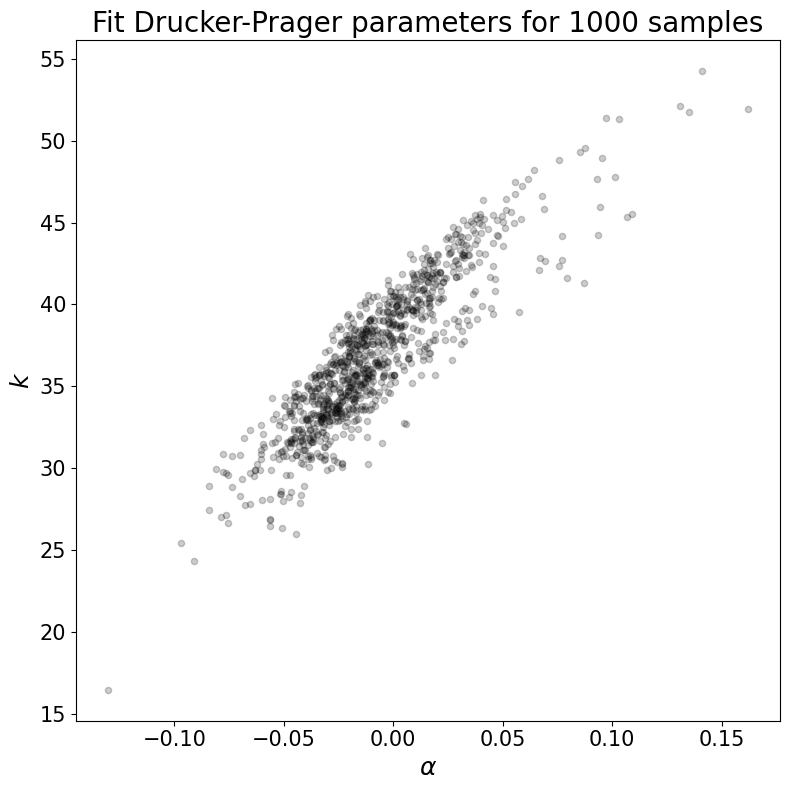

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("drucker_prager_params.csv")

plt.figure(figsize=(8, 8))

plt.scatter(df["alpha"], df["k"], color='black', s=20, alpha=0.2)
plt.xlabel(r"$\alpha$", fontsize=18)
plt.ylabel(r"$k$", fontsize=18)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title("Fit Drucker-Prager parameters for 1000 samples", fontsize=20)
plt.tight_layout()


# DP Parameters in $\sigma_{ts}, \sigma_{cs}$ space

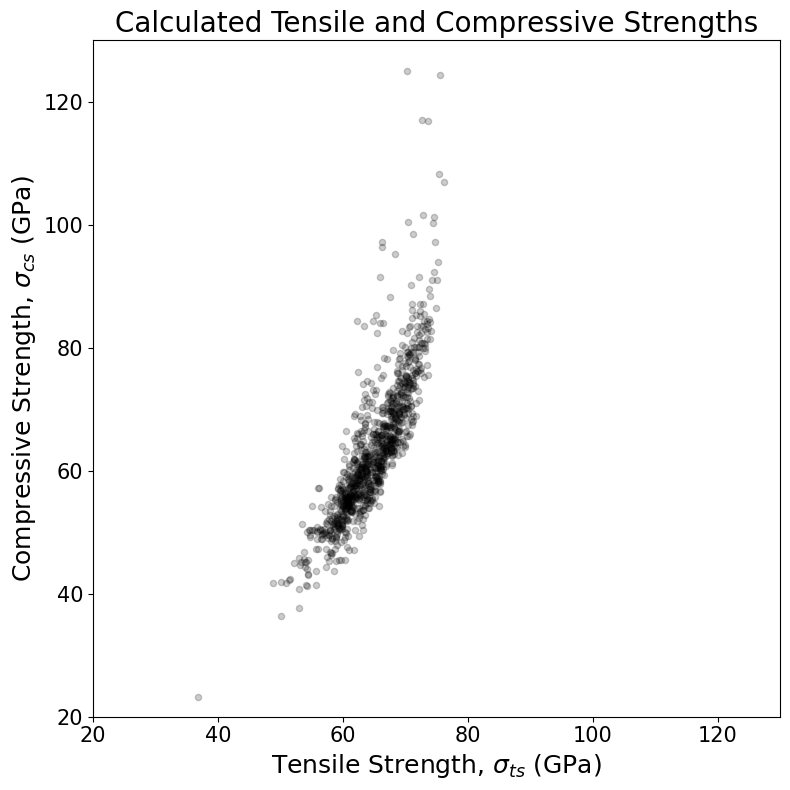

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("drucker_prager_params.csv")

plt.figure(figsize=(8, 8))

cs = (3 * df["k"]) / (np.sqrt(3) - 3 * df["alpha"])
ts = (3 * df["k"]) / (np.sqrt(3) + 3 * df["alpha"])


plt.scatter(ts, cs, color='black', s=20, alpha=0.2)
plt.xlabel(r"Tensile Strength, $\sigma_{ts}$ (GPa)", fontsize=18)
plt.ylabel(r"Compressive Strength, $\sigma_{cs}$ (GPa)", fontsize=18)

plt.xlim(20, 130)
plt.ylim(20, 130)


plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title("Calculated Tensile and Compressive Strengths", fontsize=20)
plt.tight_layout()

# DP Parameters in $\sigma_{ts}, \sigma_{bs}$ space

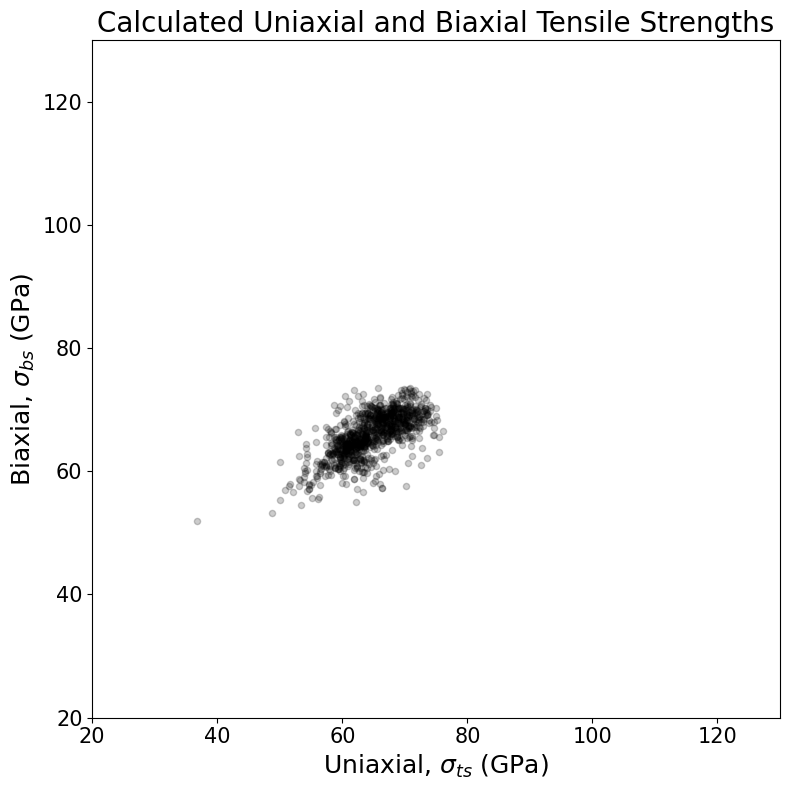

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("drucker_prager_params.csv")

plt.figure(figsize=(8, 8))

bs = (3 * df["k"]) / (np.sqrt(3) + 6 * df["alpha"])
ts = (3 * df["k"]) / (np.sqrt(3) + 3 * df["alpha"])


plt.scatter(ts, bs, color='black', s=20, alpha=0.2)
plt.xlabel(r"Uniaxial, $\sigma_{ts}$ (GPa)", fontsize=18)
plt.ylabel(r"Biaxial, $\sigma_{bs}$ (GPa)", fontsize=18)

plt.xlim(20, 130)
plt.ylim(20, 130)


plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title("Calculated Uniaxial and Biaxial Tensile Strengths", fontsize=20)
plt.tight_layout()

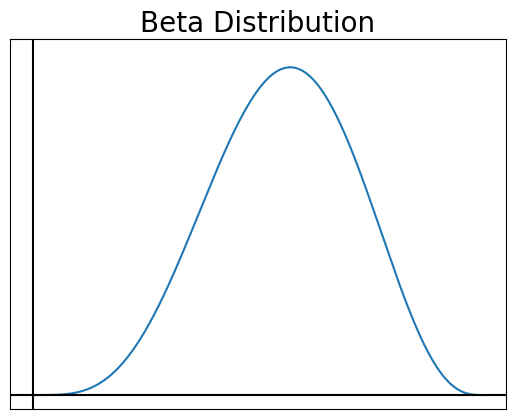

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Parameters for the beta distribution
a, b = 5, 4  # you can change these to any positive values

# Create x values from 0 to 1
x = np.linspace(0, 1, 500)
y = beta.pdf(x, a, b)

# Plot
plt.plot(x, y, label=f'Beta({a}, {b})')
plt.plot([-1, 2], [0, 0], color='black')
plt.plot([0, 0], [-1, 3], color='black')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.1, 2.55])

plt.xticks([])
plt.yticks([])

plt.title('Beta Distribution', fontsize=20)

plt.show()

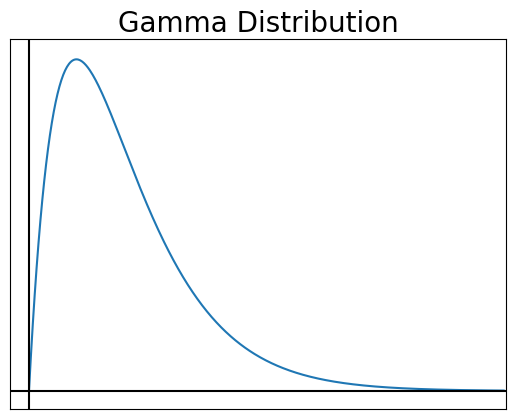

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma

# Parameters for the beta distribution
a, b = 2, 0  # you can change these to any positive values

# Create x values from 0 to 1
x = np.linspace(0, 10, 500)
y = gamma.pdf(x, a, b)

# Plot
plt.plot(x, y)
plt.plot([-1, 11], [0, 0], color='black')
plt.plot([0, 0], [-1, 11], color='black')

plt.xlim([-0.4, 10.05])
plt.ylim([-0.02, 0.39])

plt.xticks([])
plt.yticks([])

plt.title('Gamma Distribution', fontsize=20)

plt.show()

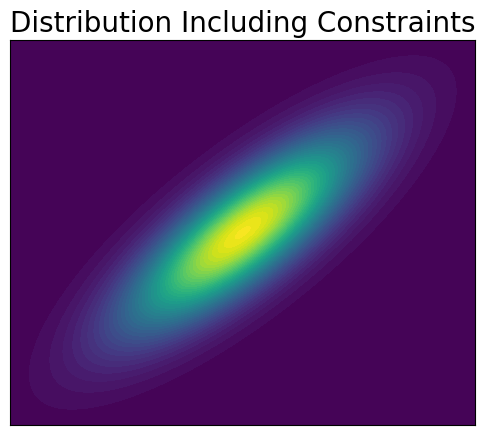

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# Define the grid
x = np.linspace(-3, 3, 300)
y = np.linspace(-3, 3, 300)
X, Y = np.meshgrid(x, y)

# Mean and covariance
mean = [0, 0]
cov = [[1.0, 0.8], [0.8, 1.0]]  # Positive correlation

# Compute the multivariate normal density
pos = np.dstack((X, Y))
rv = multivariate_normal(mean, cov)
Z = rv.pdf(pos)

# Plot
plt.figure(figsize=(6, 5))
plt.contourf(X, Y, Z, levels=50, cmap='viridis')
plt.title('Distribution Including Constraints', fontsize=20)
plt.xticks([])
plt.yticks([])
plt.show()


In [30]:
import numpy as np

ratio = 0
theta_deg = 0
sigma1 = 10
theta_rad = np.deg2rad(theta_deg)
sigma2 = ratio * sigma1

# Principal stress matrix
sigma_p = np.array([[sigma1, 0],
                    [0, sigma2]])

# Rotation matrix
c = np.cos(theta_rad)
s = np.sin(theta_rad)
Q = np.array([[c, s],
                [-s, c]])

# Rotate principal stresses back to x-y
sigma = Q @ sigma_p @ Q.T

sigma_x = np.round(sigma[0, 0], 4)
sigma_y = np.round(sigma[1, 1], 4)
sigma_xy = np.round(sigma[0, 1], 4)

print([sigma_x, sigma_y, abs(sigma_xy)])

[10.0, 0.0, 0.0]
